**Для выполнения задания я выбрал датасет с данными о численности человечества по континентам и странам с 1970 по 2022 год.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import plotly.express as px

In [3]:
population = list(csv.DictReader(open('world_population.csv')))

In [4]:
df = pd.DataFrame(population)

In [5]:
df.head(3)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Rank                         234 non-null    object
 1   CCA3                         234 non-null    object
 2   Country/Territory            234 non-null    object
 3   Capital                      234 non-null    object
 4   Continent                    234 non-null    object
 5   2022 Population              234 non-null    object
 6   2020 Population              234 non-null    object
 7   2015 Population              234 non-null    object
 8   2010 Population              234 non-null    object
 9   2000 Population              234 non-null    object
 10  1990 Population              234 non-null    object
 11  1980 Population              234 non-null    object
 12  1970 Population              234 non-null    object
 13  Area (km²)                   234 no

In [7]:
# так как все столбцы у нас имеют тип данных "object", приведем их в соответствие с типом представленных в них данных для удобства расчетов
convert_dict = {'Rank': int,
                'CCA3': str,
                'Country/Territory': str,
                'Capital': str,
                'Continent': str,
                '2022 Population': int,
                '2020 Population': int,
                '2015 Population': int,
                '2010 Population': int,
                '2000 Population': int,
                '1990 Population': int,
                '1980 Population': int,
                '1970 Population': int,
                'Area (km²)': int,
                'Density (per km²)': float,
                'Growth Rate': float,
                'World Population Percentage': float
                }
df = df.astype(convert_dict)
# также выполним переименование некоторых столбцов для более удобного представления данных
df = df.rename(columns={'2022 Population': '2022',
                '2020 Population': '2020',
                '2015 Population': '2015',
                '2010 Population': '2010',
                '2000 Population': '2000',
                '1990 Population': '1990',
                '1980 Population': '1980',
                '1970 Population': '1970'})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022                         234 non-null    int64  
 6   2020                         234 non-null    int64  
 7   2015                         234 non-null    int64  
 8   2010                         234 non-null    int64  
 9   2000                         234 non-null    int64  
 10  1990                         234 non-null    int64  
 11  1980                         234 non-null    int64  
 12  1970                         234 non-null    int64  
 13  Area (km²)          

Посмотрим на графике, как изменилось население планеты за последние 52 года

In [9]:
df1 = pd.DataFrame.from_dict({'1970': df['1970'].sum(),
         '1980': df['1980'].sum(),
         '1990': df['1990'].sum(),
         '2000': df['2000'].sum(),
         '2010': df['2010'].sum(),
         '2015': df['2015'].sum(),
         '2020': df['2020'].sum(),
         '2022': df['2022'].sum()}, orient = 'index')

In [10]:
df1

,0
1970,3694136661
1980,4442400371
1990,5314191665
2000,6147055703
2010,6983784998
2015,7424809761
2020,7839250603
2022,7973413042


<Axes: >

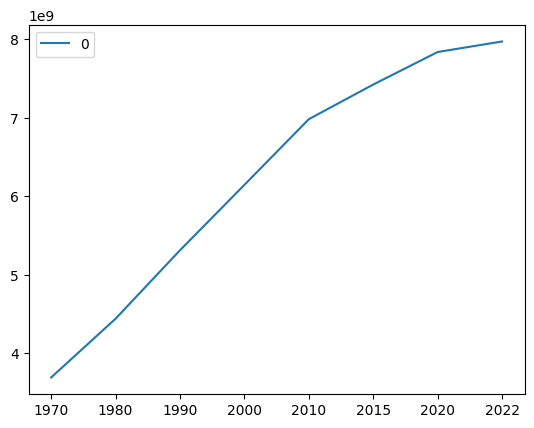

In [ ]:
df1.plot()

Видно, что с 1970 по 2010 население планеты росло линейно, затем все больше видно выход на некое "плато. Это согласуется с мнением многих экспертов по демографии, что население планеты достигнет своего пика в диапазоне значений 9-10 млрд. человек, и затем будет снижаться.

Далее рассмотрим на круговых диаграммах долю каждого континента и стран в нем в численности населения планеты, сначала за 1970 год, затем за 2022

In [ ]:
df2 = df.reindex(columns=['Country/Territory', 'Continent', '1970'])
fig = px.sunburst(df2, path=['Continent', 'Country/Territory'], values='1970')
fig.show()

In [ ]:
df3 = df.reindex(columns=['Country/Territory', 'Continent', '2022'])
fig = px.sunburst(df3, path=['Continent', 'Country/Territory'], values='2022')
fig.show()

Население планеты за последние 52 года увеличилось 7973413042/3694136661=2,16 раза. Примерно во столько же выросло население Азии, Северной и Южной Америк. Население Африки увеличилось в 1426730932/365444348=3,9 раза, а Европы в 743147538/655923991=1,13 раза. Это привело к тому, что Африка "сместила" Европу со второго места в общей доле континентов.


Построим график количества населения в 20-и самых густонаселенных странах в виде вертикальной гистограммы с сортировкой по убыванию населения по 1970 году.

<Axes: ylabel='Country/Territory'>

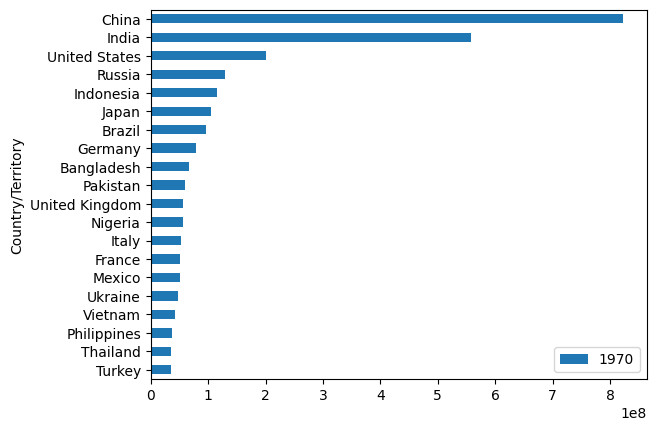

In [15]:
df.nlargest(20, '1970').sort_values(by='1970', ascending=True).plot(x = "Country/Territory", y = "1970", kind = 'barh')

Тоже самое сделаем по 2022 году

<Axes: ylabel='Country/Territory'>

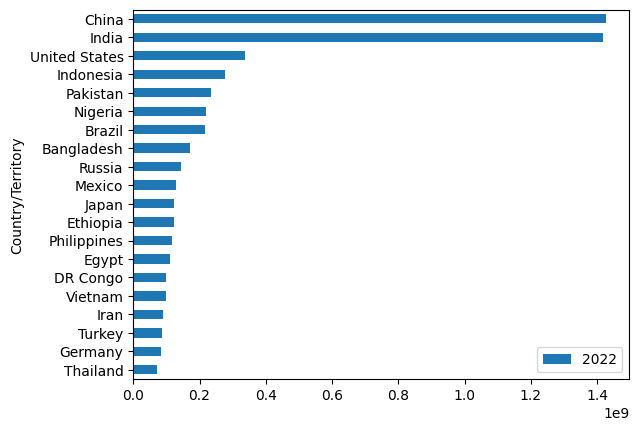

In [16]:
df.nlargest(20, '2022').sort_values(by='2022', ascending=True).plot(x = "Country/Territory", y = "2022", kind = 'barh')

Видим, что к 2022 году по численности населения Индия почти догнала Китай, Россия опустилась с 4-го на 10-е место, и в общем в первой двадцатке стало намного меньше стран из Европы и добавились страны из Азии.

Построим гистограмму, отражающую изменение численности населения в 10 самых густонаселенных странах на 2022 го

<Axes: xlabel='Country/Territory'>

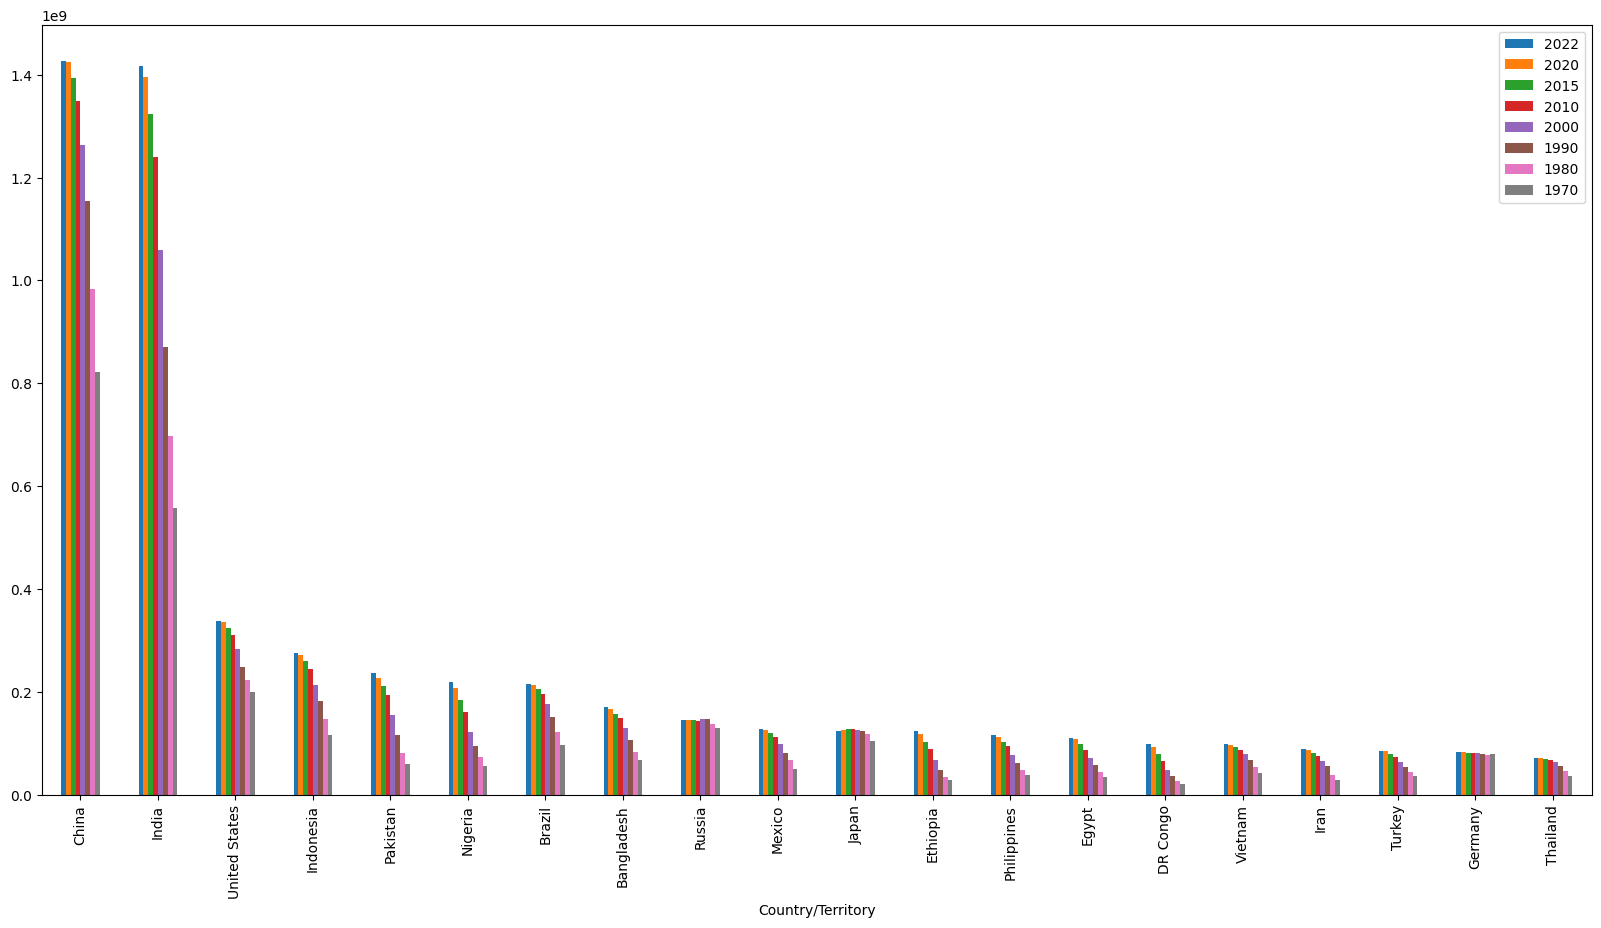

In [22]:
df4 = df.reindex(columns=['Country/Territory', '2022', '2020', '2015', '2010', '2000', '1990', '1980', '1970'])
df4.nlargest(20, '2022').sort_values(by='2022', ascending=False).plot(x = "Country/Territory", kind = 'bar', figsize=(20, 10))

На гистограмме видим, что население стран из Азии выросло за последние 52 года примерно в два раза, население стран из Африки  - выросло более, чем в два раза, население стран из Европы осталось примерно таким же.

**Резюмируя, можно сделать вывод, что в  ближайшие несколько десятилетий население планеты достигнет пика своей численности в диапазоне значений 9-10 млрд. человек, при этом расти оно будет в основном за счет увеличения численности стран Африки.**